## K_MEANS_CLUSTERING

In [1]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
from sklearn.datasets import make_blobs
x, y = make_blobs(n_samples=150,
                 n_features=2,
                 centers=3,
                 cluster_std=0.5,
                 shuffle=True,
                 random_state=0)

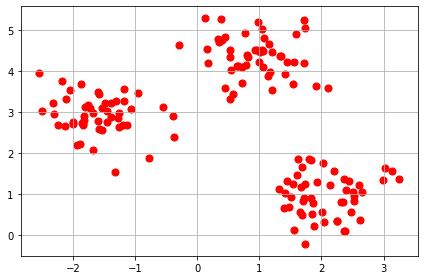

In [3]:
import matplotlib.pyplot as plt

plt.scatter(x[:,0], x[:,1], c='red', marker='o',s=50)
plt.grid()
plt.tight_layout()
plt.show()

In [4]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=5,
           init='random',
           n_init=10,
           max_iter=300,
           tol=1e-04,
           random_state=0)
y_km = km.fit_predict(x)

In [5]:
y_km

array([1, 3, 2, 2, 1, 2, 2, 1, 0, 2, 1, 0, 0, 3, 2, 0, 0, 1, 0, 1, 3, 1,
       3, 2, 0, 1, 1, 3, 0, 4, 0, 0, 0, 0, 2, 4, 1, 4, 3, 2, 0, 0, 2, 1,
       4, 1, 0, 3, 0, 3, 4, 2, 2, 1, 1, 0, 3, 1, 0, 3, 0, 0, 0, 0, 3, 0,
       2, 4, 2, 2, 3, 4, 1, 2, 4, 2, 3, 0, 0, 2, 4, 1, 3, 2, 4, 1, 1, 0,
       0, 1, 1, 3, 4, 2, 4, 3, 0, 0, 4, 4, 4, 1, 0, 1, 4, 2, 0, 3, 2, 2,
       0, 3, 4, 0, 2, 0, 2, 3, 0, 0, 3, 1, 2, 2, 4, 4, 0, 1, 0, 0, 0, 0,
       4, 0, 0, 0, 3, 0, 4, 0, 3, 3, 1, 1, 0, 0, 0, 0, 1, 1])

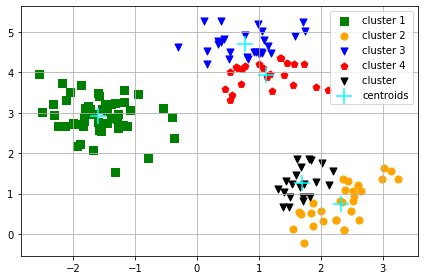

In [6]:
plt.scatter(x[y_km == 0,0],
            x[y_km == 0,1],
            s=50,
           c='green',
           marker='s',
           label='cluster 1')
plt.scatter(x[y_km == 1,0],
           x[y_km == 1,1],
           s=50,
           c='orange',
           marker='o',
           label='cluster 2')
plt.scatter(x[y_km == 2,0],
           x[y_km == 2,1],
           s=50,
           c='blue',
           marker='v',
           label='cluster 3')
plt.scatter(x[y_km == 3,0],
           x[y_km == 3,1],
           s=50,
           c='red',
           marker='p',
           label='cluster 4')
plt.scatter(x[y_km == 4,0],
           x[y_km == 4,1],
           s=50,
           c='black',
           marker='v',
           label='cluster ')
plt.scatter(km.cluster_centers_[:,0],
           km.cluster_centers_[:,1],
           s=250,
            marker='+',
           c='cyan',label='centroids')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


In [7]:
print('distortion: %.2f' % km.inertia_)

distortion: 55.24


## Usig the elow mothod to find the optimal number of clusters

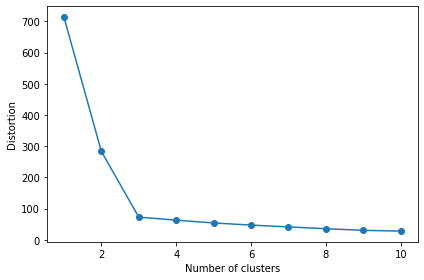

In [8]:
distortions = []
for i in range(1, 11):
    km =  KMeans(n_clusters =i,
                init='k-means++',
                n_init=10,
                max_iter=300,
                random_state=0)
    km.fit(x)
    distortions.append(km.inertia_)
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()

## Quatifying the quality of clusterig via silhouette plots

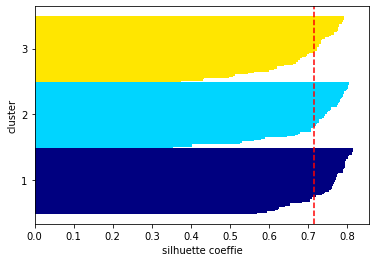

In [9]:
import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples

km = KMeans(n_clusters = 3,
           init= 'k-means++',
           n_init=10,
           max_iter=300,
           tol=1e-04,
           random_state=0)
y_km = km.fit_predict(x)

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(x, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(i/n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0,
            edgecolor='none', color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower +=len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color='red', linestyle='--')

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('cluster')
plt.xlabel('silhuette coeffie')
plt.show()

In [10]:
print('Distrortion: %.2f' % km.inertia_)

Distrortion: 72.48
